- https://datascienceschool.net/view-notebook/691326b7f88644f79ec7ddc9f27f84ec/
- https://darkpgmr.tistory.com/171

## How to get frequency domain?

### Sound?

소리는 일반적으로 진동으로 인한 공기의 압축으로 생성됩니다. 그렇다면 압축이 얼마나 됬느냐에 따라서 표현되것이 바로 Wave(파동)이라고 했습니다. 

Wave에서 저희가 얻을수 있는 정보는 크게 3가지가 있습니다.
- Phase(Degress of displacement) : 위상
- Amplitude(Intensity) : 진폭
- Frequency : 주파수

<img src='./img/air.png' width=50%>

### Frequency (pitch)

일반적으로 소리의 Frequency는 The number of compressed를 표현합니다. 단위는 Hertz를 사용하며, 1Hertz는 1초에 한번 vibration을 의미합니다. 일반적으로 주파수는 우리가 알고 있는 pitch (음)과 동일합니다. 일반적으로 pitch는 사람이 인지하는 음의 높낮이 입니다 (고음과 저음).

<img src='./img/frequency.png' width=70%>

하지만 우리가 Sampling했던 데이터에는 Time과 Amplitude 까지 표현이 가능했습니다. 그렇다면 어떻게 frequency 데이터를 얻을 수 있을까요?

### 푸리에 변환 (Fourier transform)


푸리에 변환(Fourier transform)을 직관적으로 설명하면 푸리에 변환은 임의의 입력 신호를 다양한 주파수를 갖는 주기함수들의 합으로 분해하여 표현하는 것 입니다. 

<img src='./img/fft.png' width=70%>

즉 퓨리에 변환은 입력 singal이 어떤것인지 상관없이 sin, cos과 같은 주기함수들의 합으로 항상 분해 가능하다는 것입니다. 

- 주기(period): 파동이 한번 진동하는데 걸리는 시간, 또는 그 길이, 일반적으로 sin함수의 주기는 $2\pi /w$입니다
- 주파수(frequency): 1초동안의 진동횟수입니다.

$$
y(t)=\sum_{k=-\infty}^\infty A_k \, \exp \left( i\cdot 2\pi\frac{k}{T} t \right)
$$

이 식을 하나식 해석해보자. $k$는 $-\infty ~ \infty$의 범위를 가지고 간다. 이것은 사인함수의 갯수라고 생각하자. 그렇다면 $A_n$은 그 사인함수의 진폭이라고 한다. 이 식은 시간에 대한 입력신호 $y_{t}$가  $\exp \left( i\cdot 2\pi\frac{k}{T} t \right)$ 들의 합으로 표현 된다는 것입니다. 위 식을 진폭에 대해서도 표현이 가능하다.

$$
A_k = \frac{1}{T} \int_{-\frac{T}{2}}^\frac{T}{2} f(t) \, \exp \left( -i\cdot 2\pi \frac{k}{T} t \right) \, dt
$$


### DFT (Discrete Fourier Transform)

한가지 의문점이 든다 바로, 우리가 sampling으로 들어온 데이터는 바로 시간의 간격에 따른 소리의 amplitude의 discrete한 데이터이기 때문이다. 그렇다면 위 푸리에 변환 식을 Discrete한 영역으로 생각해보자.

만약에 우리가 수집한 데이터에서, 이산 시계열 데이터가 주기 $N$으로 반복한다고 할때, DFT는 주파수와 진폭이 다른 $N$개의 사인 함수의 합으로 표현이 가능하다.
$$
y_n = \frac{1}{N} \sum_{k=0}^{N-1} Y_k \cdot \exp \left( i\cdot 2\pi\frac{k}{N} n \right)
$$

위 식을 보면 k의 range가 0부터 $N-1$로 변화했음을 알 수 있다. 이때 진폭 $Y_{k}$를 원래의 시계열 데이터에 대한 퓨리에 변환값이라고 한다.

$$
Y_k = \sum_{n=0}^{N-1} y_n\cdot \exp \left( -i\cdot 2\pi\frac{k}{N} n \right)
$$

이는 사실 signal과 Complex sinusoids의 내적과 같다.

### FFT (Fast Fourier transform)

FFT는 적은 계산량으로 이산 푸리에 변환값을 계산하는 알고리즘이다. 구현을 위해 지난번에 사용했던 데이터를 사용해보자

In [110]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import librosa
train_audio_path = 'input/train/audio'
filename = '/yes/ffd2ba2f_nohash_0.wav'
samples, sample_rate = librosa.load(str(train_audio_path)+filename)

In [35]:
from scipy.fftpack import fft
N = 512
T = 1.0 / 44100.0
yf = fft(samples, N)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

In [86]:
yf[0]

(-0.12515423+0j)

퓨리에 변환이 끝나면, 이제 실수부와 허수부를 가지는 복소수가 얻어집니다. 이러한 복소수의 절대값은 Spectrum, magnitude라고 부르며 (주파수의 강도), 복소수가 가지는 phase를 phase spectrum (주파수의 위상)이라고 부르게 됩니다.

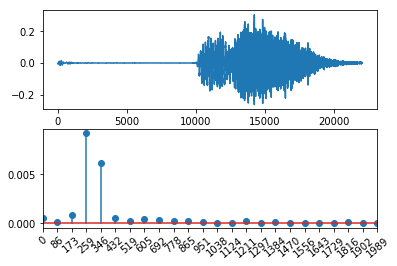

In [36]:
plt.subplot(211)
plt.plot(samples)

plt.subplot(212)
plt.stem(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xticks(xf, rotation=40)
plt.xlim(0, 1989)

plt.show()

### STFT (Short-Time Fourier Transform)

FFT는 시간에 흐름에 따라 신호의 수파수가 변했을때, 어느 시간대에 주파수가 변하는지 모르게 됩니다. 이러한 한계를 극복하기 위해서, STFT는 시간의 길이를 나눠서 이제 퓨리에 변환을 하게 됩니다. 즉 FFT를 했을때는 Time domina에 대한 정보가 날아가게 되는 것이죠.

주파수의 특성이 시간에 따라 달라지는 사운드를 분석하는 방법입니다. 일반적으로 우리가 사용하는 signal 데이터에 적합하다. 시계열 데이터를 일정한 시간 구간 (window size)로 나누고, 각 구간에 대해서 스펙트럼을 구하는 데이터이다. 이는 Time-frequency 2차원 데이터료 표현이 됩니다.
$$
X(l,k) = \sum_{n=0}^{N-1} w(n) x(n+lH)\exp^{\frac{-2\pi k n}{N}}
$$

- $N$ : FFT size
- $w(n)$ : window function
    - 일반적으로 Hann window가 쓰입니다.
- $n$ : window size
    - window 함수에 들어가는 Sample의 양입니다.
    - 작을수록 low-frequency resolution을 가지게 되고, high-time resolution을 가집니다.
    - 길수록 high frequency, low time resolution을 가집니다.
- $H$ : hop size
    - 윈도우가 겹치는 사이즈입니다. 일반적으로는 1/4정도를 겹치게 합니다.

STFT의 결과는 즉 시간의 흐름(Window)에 따른 Frequency영역별 Amplitude를 반환합니다.

In [58]:
# STFT
S = librosa.core.stft(samples, n_fft=1024, hop_length=512, win_length=1024)

In [79]:
S.shape, len(S[0]), S[0][0]

((513, 44), 44, (-0.2504628+0j))

In [80]:
sample_rate/512

43.06640625

여기서 실수부를 제거하면서 magnitude에 대한 데이터만 받아와봅시다.

In [81]:
# phase 에 대한 정보를 날린다.
D = np.abs(S)**2

In [84]:
D.shape

(513, 44)

### Mel Filter bank

일반적으로 사람은, 인접한 주파수를 크게 구별하지 못합니다. 그 이유는 우리의 인지기관이 categorical한 구분을 하기 때문입니다. 때문에 우리는 주파수들의 Bin의 그룹을 만들고 이들을 합하는 방식으로, 주파수 영역에서 얼마만큼의 에너지가 있는지를 찾아볼 것입니다.

멜 스펙트럼은 주파수 단위를 다음 공식에 따라 멜 단위로 바꾼 것을 의미합니다. 이 멜 필터는 저주파 주변에서 얼마만큼 에너지가 있는지를 알려줍니다. 주파수가 올라갈수록 필터의 폭이 높아지면서 고주파는 거의 고려를 안하게 됩니다.

<img src='./img/melbank.png' width=70%>


$$
m = 2595 \log_{10}\left(1 + \frac{f}{700}\right)
$$

In [87]:
# mel spectrogram (512 --> 40)
mel_basis = librosa.filters.mel(sample_rate, 1024, n_mels=40)
mel_S = np.dot(mel_basis, D)

In [89]:
mel_S.shape

(40, 44)

### Log compression

$$ 10 * log10(\frac{S}{ref})$$
의 단위로 신호를 스케일링 합니다. 이는 spectrogram을 데시벨 유닛으로 전환해 줍니다.

In [44]:
#log compression
log_mel_S = librosa.power_to_db(mel_S)

In [92]:
log_mel_S.shape

(40, 2)

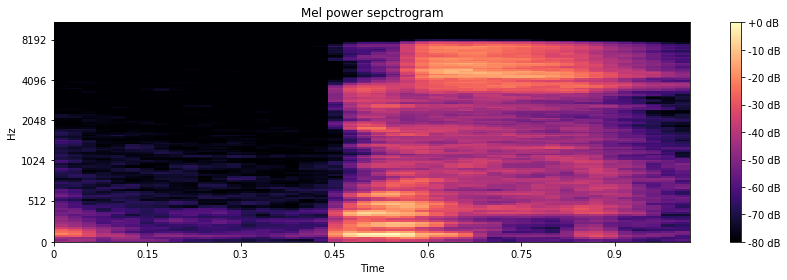

In [96]:
S = librosa.feature.melspectrogram(samples, sr=sample_rate, n_mels = 128)
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power sepctrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

### Discrete cosine transform (DCT)

DCT는 n개의 데이터를 n개의 코사인 함수의 합으로 표현하여 데이터의 양을 줄이는 방식입니다. 

- 저 주파수에 에너지가 집중되고 고 주파수 영역에 에너지가 감소합니다.
- 

Filter Bank는 모두 Overlapping 되어 있기 때문에 Filter Bank 에너지들 사이에 상관관계가 존재하기 때문이다. DCT는 에너지들 사이에 이러한 상관관계를 분리 해주는 역활을 해줍니다.

6 단계 : 하지만 여기서 26개 DCT Coefficient 들 중 12만 남겨야 하는데, 그 이유는 DCT Coefficient 가 많으면, Filter Bank 에너지의 빠른 변화를 나타내게 되고, 이것은 음성인식의 성능을 낮추게 되기 때문이다.

In [94]:
# mfcc (DCT)
mfcc = librosa.feature.mfcc(S=log_mel_S, n_mfcc=13)
mfcc = mfcc.astype(np.float32)    # to save the memory (64 to 32 bits)
mfcc

array([[-3.4033028e+01, -3.8094513e+01],
       [ 1.1510379e+02,  1.1583600e+02],
       [ 1.2229981e+01,  1.2480648e+01],
       [ 7.5253987e+00,  7.2943449e+00],
       [-4.1109309e+00, -4.7345519e+00],
       [-5.8448000e+00, -6.7223282e+00],
       [-7.1884546e+00, -8.1581182e+00],
       [-5.0726571e+00, -5.9787078e+00],
       [-3.0889616e+00, -3.8112624e+00],
       [-7.2842062e-01, -1.2006184e+00],
       [ 2.0635508e-01, -6.8849609e-03],
       [ 2.1682553e-01,  2.2581533e-01],
       [-1.0798851e+00, -9.0959924e-01]], dtype=float32)

(13, 44)


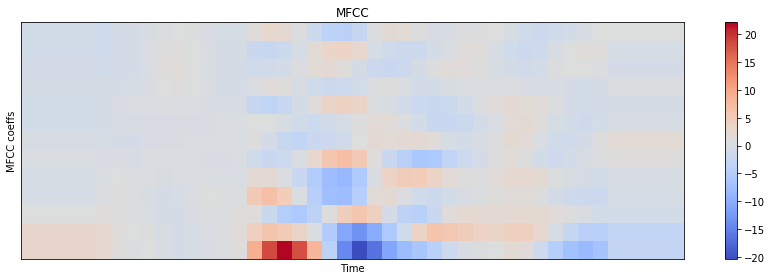

In [98]:
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)
print(delta2_mfcc.shape)

plt.figure(figsize=(12,4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

In [116]:
import os
from os.path import isdir, join
from scipy.io import wavfile
from scipy.fftpack import fft
from scipy import signal

In [117]:
dirs = [f for f in os.listdir(train_audio_path) if isdir(join(train_audio_path, f))]
dirs.sort()
print('Number of labels: ' + str(len(dirs)))

Number of labels: 31


In [118]:
def custom_fft(y, fs):
    T = 1.0 / fs
    N = y.shape[0]
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    vals = 2.0/N * np.abs(yf[0:N//2])  # FFT is simmetrical, so we take just the first half
    # FFT is also complex, to we take just the real part (abs)
    return xf, vals

In [119]:
def log_specgram(audio, sample_rate, window_size=20,
                 step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio,
                                    fs=sample_rate,
                                    window='hann',
                                    nperseg=nperseg,
                                    noverlap=noverlap,
                                    detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

['down', 'go', 'left', 'no', 'off', 'on', 'right', 'stop', 'up', 'yes']


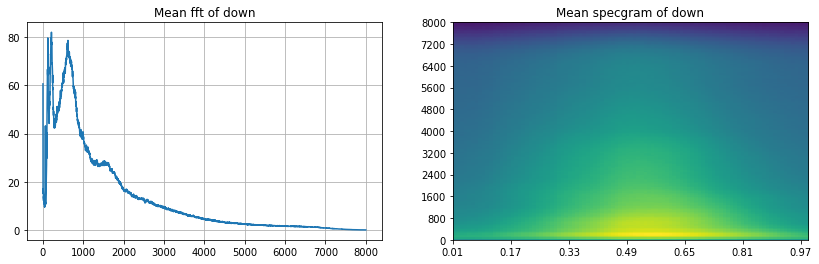

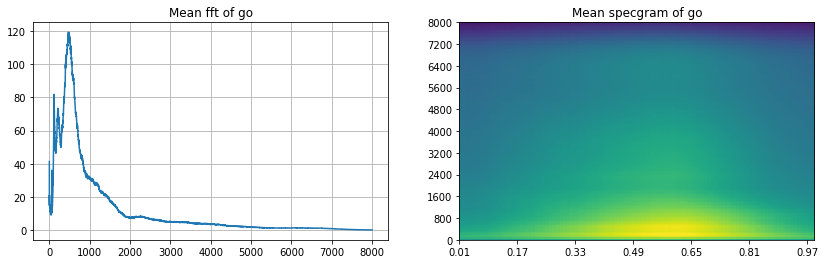

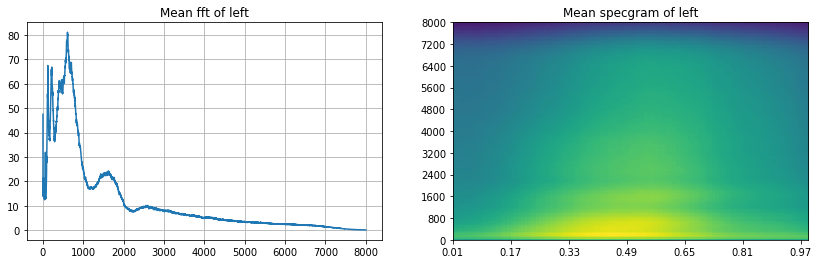

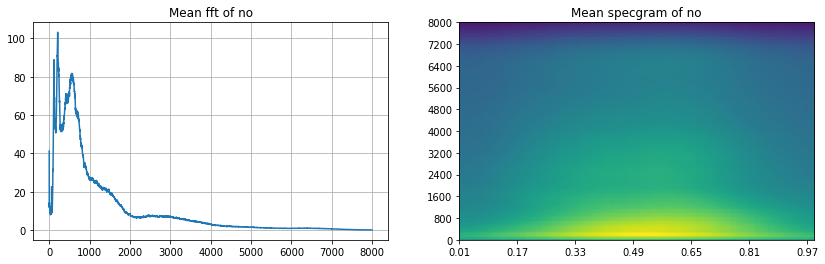

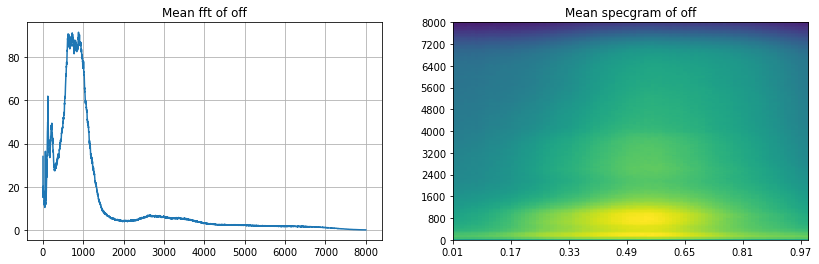

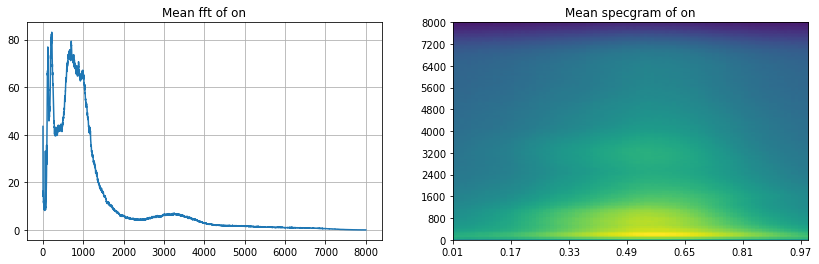

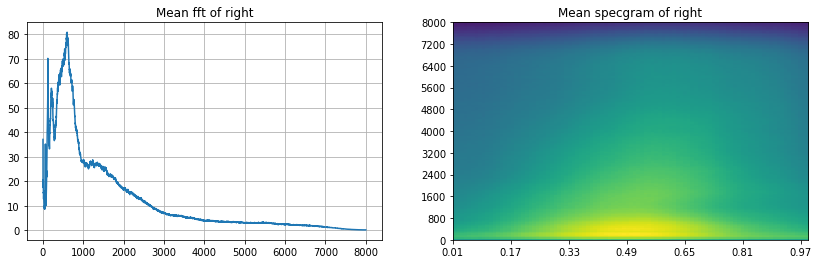

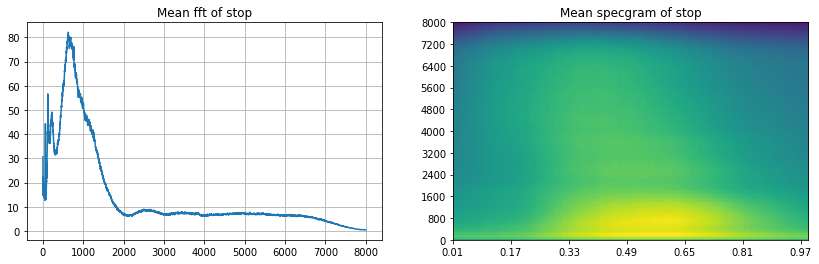

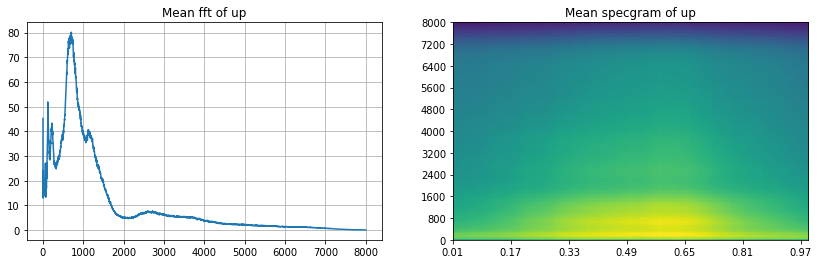

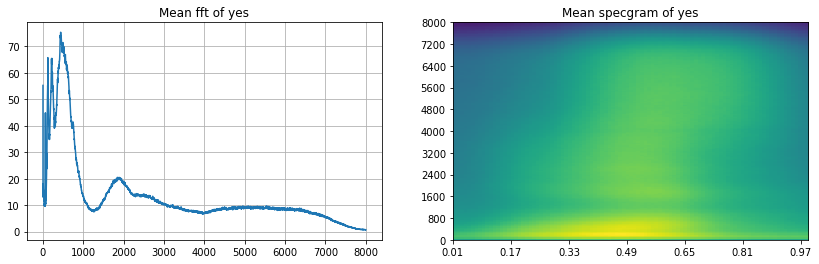

In [120]:
train_audio_path = 'input/train/audio/'
to_keep = 'yes no up down left right on off stop go'.split()
dirs = [d for d in dirs if d in to_keep]

print(dirs)

for direct in dirs:
    vals_all = []
    spec_all = []

    waves = [f for f in os.listdir(join(train_audio_path, direct)) if f.endswith('.wav')]
    for wav in waves:
        sample_rate, samples = wavfile.read(train_audio_path + direct + '/' + wav)
        if samples.shape[0] != 16000:
            continue
        xf, vals = custom_fft(samples, 16000)
        vals_all.append(vals)
        freqs, times, spec = log_specgram(samples, 16000)
        spec_all.append(spec)

    plt.figure(figsize=(14, 4))
    plt.subplot(121)
    plt.title('Mean fft of ' + direct)
    plt.plot(np.mean(np.array(vals_all), axis=0))
    plt.grid()
    plt.subplot(122)
    plt.title('Mean specgram of ' + direct)
    plt.imshow(np.mean(np.array(spec_all), axis=0).T, aspect='auto', origin='lower', 
               extent=[times.min(), times.max(), freqs.min(), freqs.max()])
    plt.yticks(freqs[::16])
    plt.xticks(times[::16])
    plt.show()